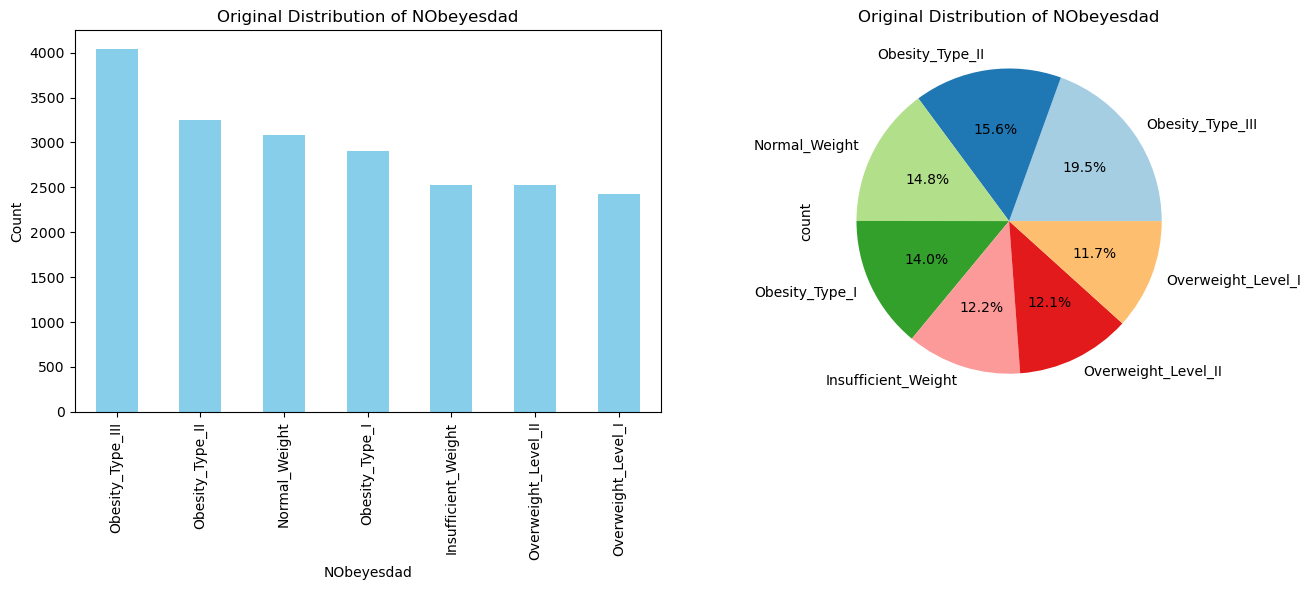

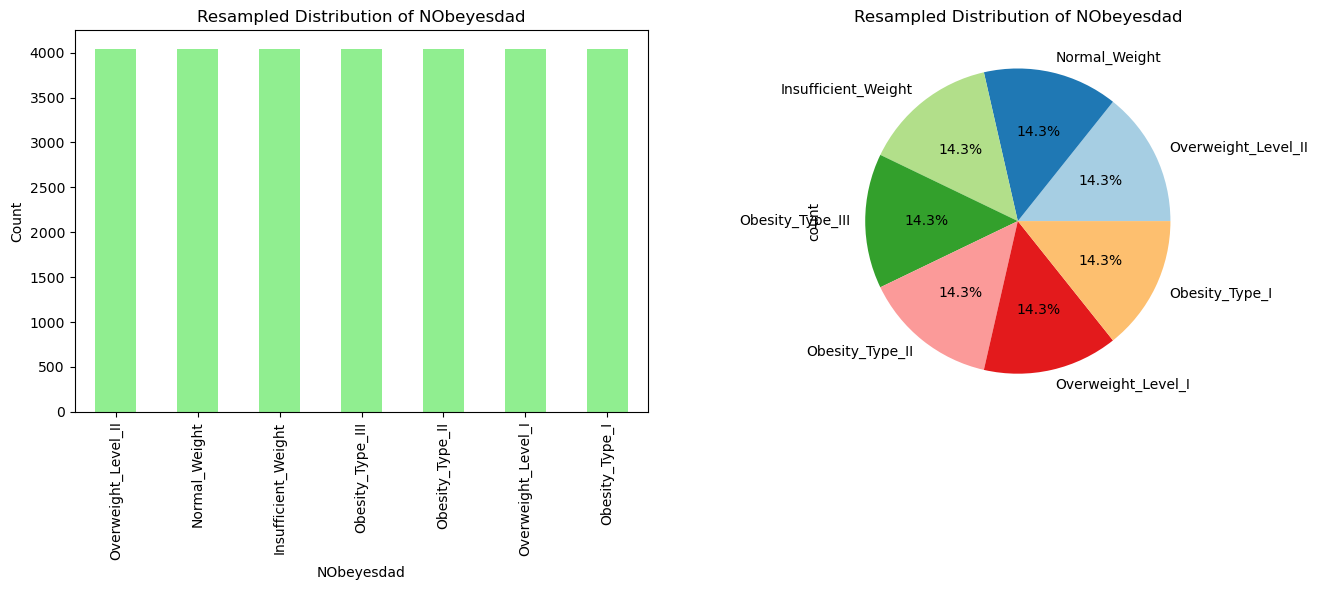

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data
LargeTrain = pd.read_csv('train.csv')

# Extract features and target
y_train = LargeTrain['NObeyesdad']
X_train = LargeTrain.drop(columns='NObeyesdad')

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define numerical and categorical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'SCC', 'MTRANS']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))])
         , categorical_features)
    ])

# Preprocess the data
X_train_encoded = preprocessor.fit_transform(X_train)

# Plot the original distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Original Distribution of NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Original Distribution of NObeyesdad')

plt.tight_layout()
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train_encoded)

# Decode the resampled target variable
y_train_resampled = label_encoder.inverse_transform(y_train_resampled)

# Plot the resampled distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='lightgreen')
plt.title('Resampled Distribution of NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Resampled Distribution of NObeyesdad')

plt.tight_layout()
plt.show()
